In [1]:
import numpy as np

import torch.nn as nn
import torch.optim as optim
from scheduler import CyclicCosineDecayLR

import matplotlib.pyplot as plt

import warnings
# pytorch warns when scheduler.step() is called before optimizer.step()
# ignore warnings in this notebook
warnings.filterwarnings('ignore')

In [2]:
def train():
    # training routines run here
    # commented out for simplicity
    
#     model.train()
#     for xb, yb in dataloader:
#         xb, yb = xb.to(device), yb.to(device)
#         optimizer.zero_grad()
#         out = model(xb)
#         loss = loss_function(out, yb)
#         loss.backward()
#         optimizer.step()
    return

def validate():
    # validation routines run here 
    # commented out for simplicity
    
#     y_pred, y_true = [], []
#     model.eval()
#     with torch.no_grad():
#         for xb, yb in dataloader:
#             xb = xb.to(device)
#             out = model(xb)
#             y_pred.append(out.detach_().cpu())
#             y_true.append(yb)
#         y_pred = torch.cat(y_pred, dim=0)
#         y_true = torch.cat(y_true, dim=0)
#     return metric_function(y_pred, y_true)
    return

In [3]:
class TestNet(nn.Module):
    def __init__(self):
        super(TestNet, self).__init__()
        self.fc = nn.Linear(10,5)
    def forward(self, x):
        return self.fc(x)      

In [4]:
def visualize_learning_rate(scheduler, epochs):
    lrs = [[] for _ in range(len(scheduler.optimizer.param_groups))]
    for epoch in range(epochs):
        train()
        validate()
        for lst, dct in zip(lrs, scheduler.optimizer.param_groups):
            lst.append(dct['lr'])
#         lrs.append(scheduler.optimizer.param_groups[0]["lr"])
        scheduler.step()
    
    lists = []
    for l in lrs:
        lists.append(list(range(epochs)))
        lists.append(l)
    plt.figure(figsize=(12,4)) 
    lines = plt.plot(*lists)
    plt.setp(lines[0], linewidth=3)
    plt.title('Learning rate change')
    plt.xlabel('Epochs')
    plt.ylabel('Learning rate')
    plt.xticks(np.arange(0, epochs + 1, 10), rotation=45)
    plt.yticks(np.arange(0.01, 0.11, 0.01))
    plt.grid(True)
    plt.show()

In [5]:
model = TestNet()

### Fixed cycle intervals

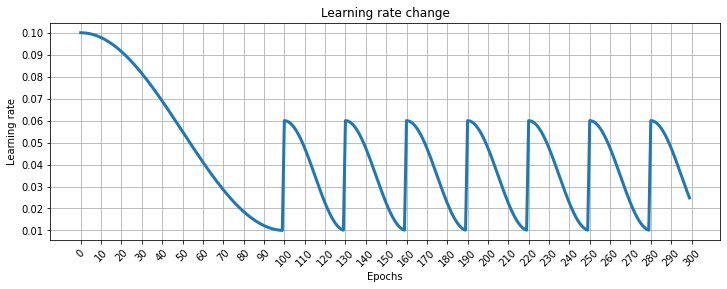

In [6]:
optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler = CyclicCosineDecayLR(optimizer, 
                                init_decay_epochs=100,
                                min_decay_lr=0.01,
                                restart_interval = 30,
                                restart_lr=0.06)

visualize_learning_rate(scheduler, epochs=300)

### Geometrically increasing cycle intervals

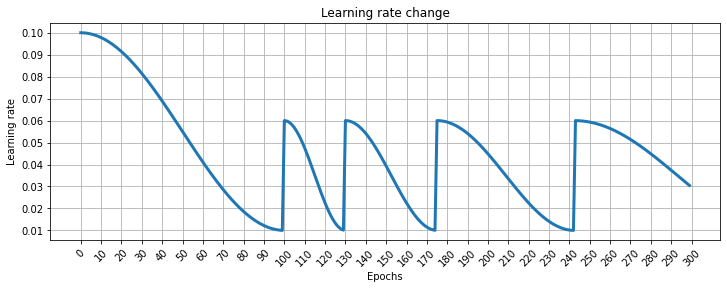

In [7]:
optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler = CyclicCosineDecayLR(optimizer, 
                                init_decay_epochs=100,
                                min_decay_lr=0.01,
                                restart_interval=30,
                                restart_interval_multiplier=1.5,
                                restart_lr=0.06)

visualize_learning_rate(scheduler, epochs=300)

if `restart_lr` is omitted, learning rate is set to `lr` on each restart

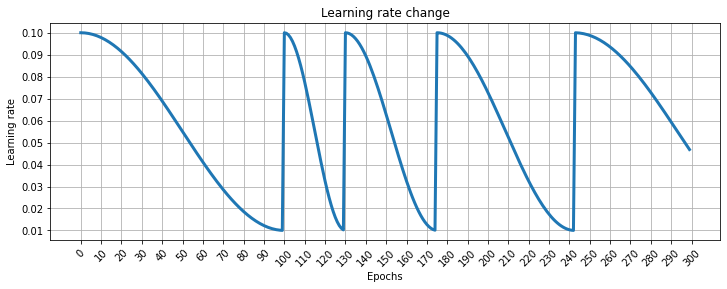

In [8]:
optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler = CyclicCosineDecayLR(optimizer, 
                                init_decay_epochs=100,
                                min_decay_lr=0.01,
                                restart_interval=30,
                                restart_interval_multiplier=1.5)

visualize_learning_rate(scheduler, epochs=300)

### With warmup

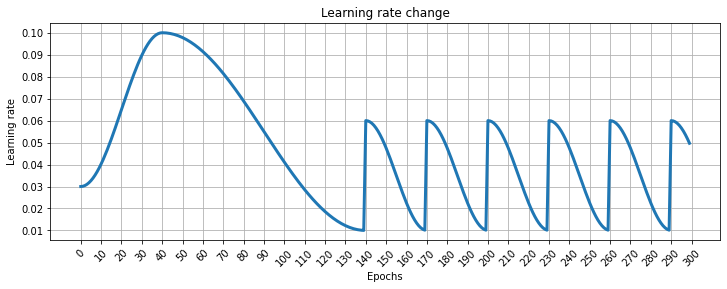

In [9]:
optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler = CyclicCosineDecayLR(optimizer, 
                                init_decay_epochs=100,
                                min_decay_lr=0.01,
                                restart_interval = 30,
                                restart_lr=0.06,
                                warmup_epochs=40,
                                warmup_start_lr=0.03)

visualize_learning_rate(scheduler, epochs=300)

### No warmup, no cycles

Just a normal cosine annealing

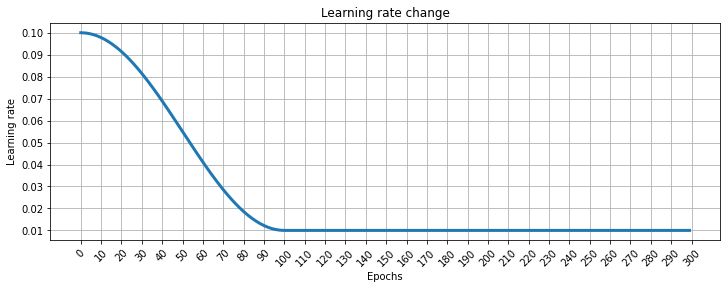

In [10]:
optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler = CyclicCosineDecayLR(optimizer, 
                                init_decay_epochs=100, 
                                min_decay_lr=0.01)

visualize_learning_rate(scheduler, epochs=300)

### Multiple parameter groups 

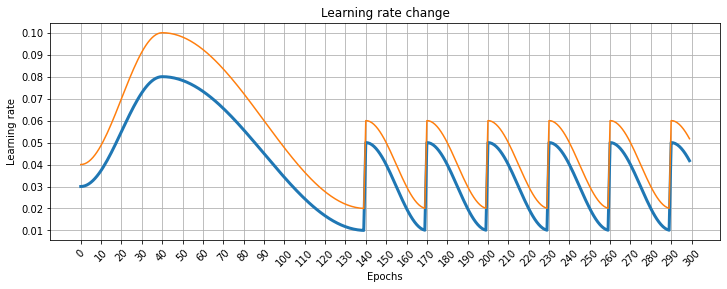

In [11]:
model2 = TestNet()
optimizer_mul = optim.SGD([
    {'params': model.parameters(), 'lr': 0.08},
    {'params': model2.parameters(), 'lr': 0.1}
])

scheduler = CyclicCosineDecayLR(optimizer_mul, 
                                init_decay_epochs=100,
                                min_decay_lr=[0.01, 0.02],
                                restart_interval = 30,
                                restart_lr=[0.05, 0.06],
                                warmup_epochs=40,
                                warmup_start_lr=[0.03, 0.04])

visualize_learning_rate(scheduler, epochs=300)